#### Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import Files

In [23]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [24]:
crash_df= sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


#### Distribution Plot
*  Provides a way to look at a univariate distribution. A 
*  Univeriate distribution provides a distribution for one variable
*  Kernal Density Estimation with a Histogram is provided
*  Bins define how many buckets to divide the data up into between intervals

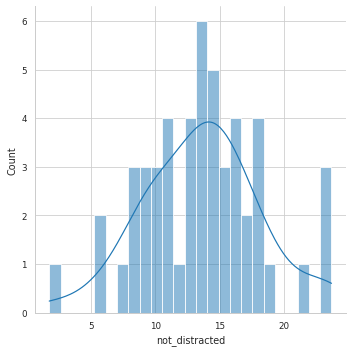

In [25]:
sns.displot(crash_df['not_distracted'], kde=True,bins=25)

#### Joint Plot
* Jointplot compares 2 distributions and plots a scatter plot by default
*  As we can see as people tend to speed they also tend to drink & drive
*  With kind you can create a regression line with kind='reg'
*  You can create a 2D KDE with kind='kde'
*  Kernal Density Estimation estimates the distribution of data
*  You can create a hexagon distribution with kind='hex'

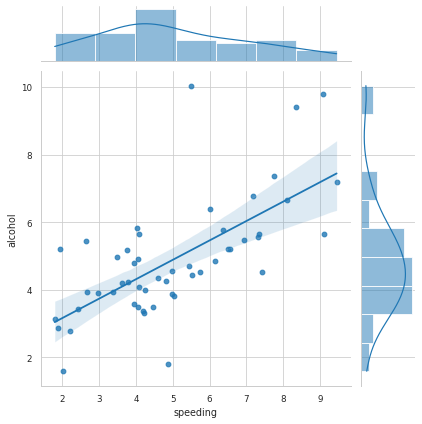

In [26]:
sns.jointplot(x='speeding', y='alcohol',data=crash_df,kind='reg')

#### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

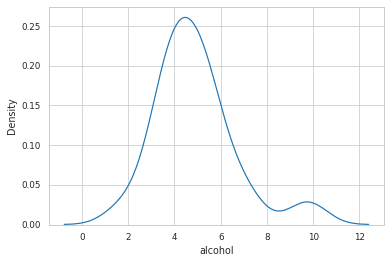

In [27]:
sns.kdeplot(crash_df['alcohol'])

#### Pair Plot
* Pair Plot plots relationships across the entire data frames numerical values

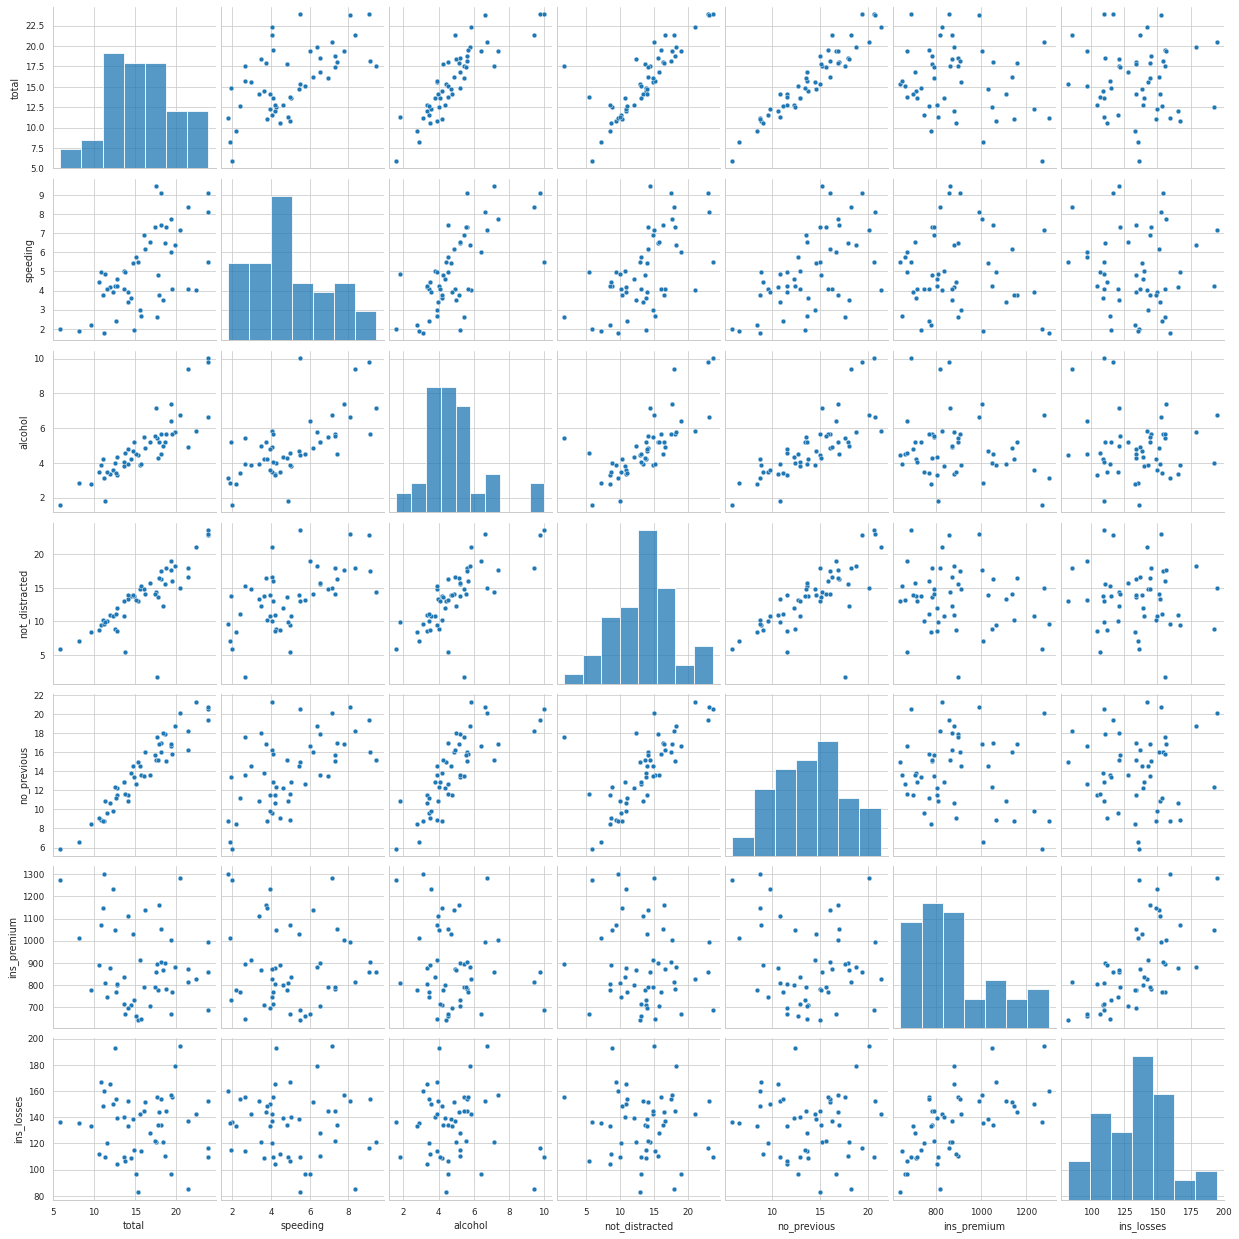

In [28]:
sns.pairplot(crash_df)

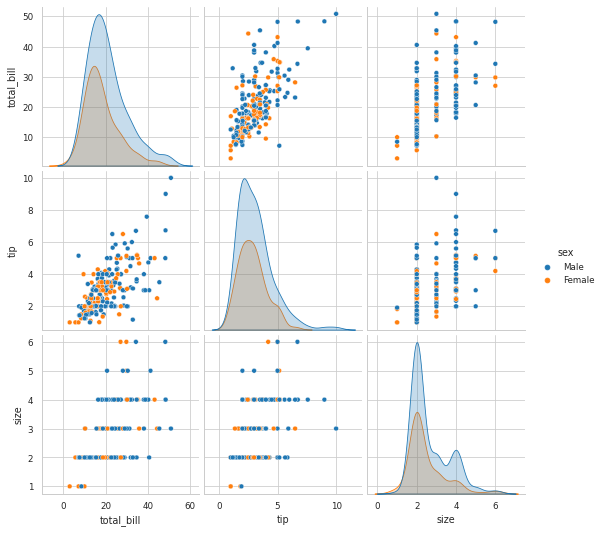

In [29]:
tips_df= sns.load_dataset('tips')

sns.pairplot(tips_df, hue='sex')

In [30]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#### Rug Plot
*  Not much useful

<AxesSubplot:xlabel='tip'>

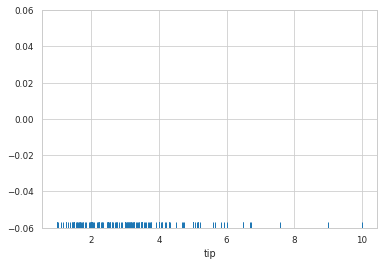

In [31]:
sns.rugplot(tips_df['tip'])

#### Styling

* Change size of lables, lines and other elements to best fit
* how you will present your data (paper, talk, poster)
*  Get rid of spines
* You can turn of specific spines with right=True, left=True
* bottom=True, top=True


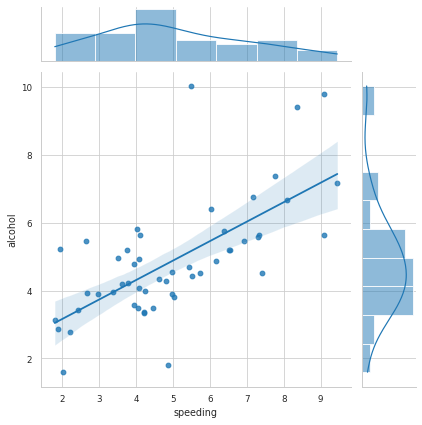

In [32]:
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=1)
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')
sns.despine(left=False, bottom=False)

# Categorical Plots

#### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

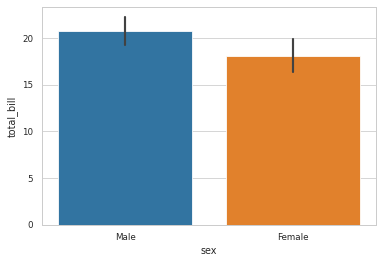

In [33]:
sns.barplot(x='sex',y='total_bill',data=tips_df)

#### Count Plot
* A count plot is like a bar plot, but the estimator is counting  the number of occurances

<AxesSubplot:xlabel='sex', ylabel='count'>

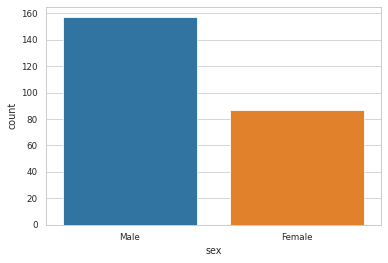

In [34]:
sns.countplot(x='sex',data=tips_df)

#### Box Plot
* A box plot allows you to compare different variables
* The box shows the quartiles of the data. The bar in the middle is the median and the box extends 1 standard deviation from the median
* The whiskers extend to all the other data aside from the points that are considered to be outliers
* Hue can add another category being sex
* We see men spend way more on Friday versus less than women on Saturday

<AxesSubplot:xlabel='day', ylabel='total_bill'>

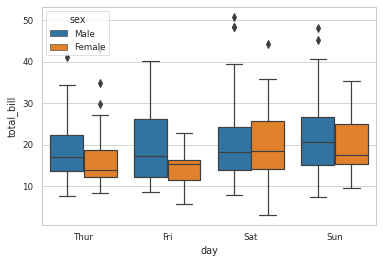

In [35]:
sns.boxplot(x='day',y='total_bill',data=tips_df,hue='sex')

#### Violin Plot
* Violin Plot is a combination of the boxplot and KDE 
* While a box plot corresponds to data points, the violin plot uses the KDE estimation of the data points
* Split allows you to compare how the categories compare to each other

<AxesSubplot:xlabel='day', ylabel='total_bill'>

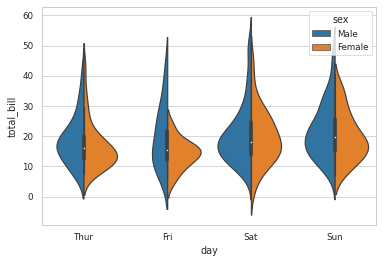

In [36]:
sns.violinplot(x='day',y='total_bill',data=tips_df,hue='sex',split=True)

#### Strip Plot
* The strip plot draws a scatter plot representing all data points where one variable is categorical. It is often used to show all observations with a box plot that represents the average distribution
* Jitter spreads data points out so that they aren't stacked on top of each other
* Hue breaks data into men and women
* Dodge separates the men and women data

<AxesSubplot:xlabel='day', ylabel='total_bill'>

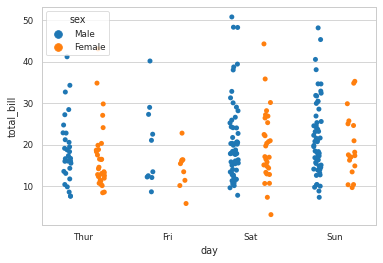

In [37]:
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

#### Palettes


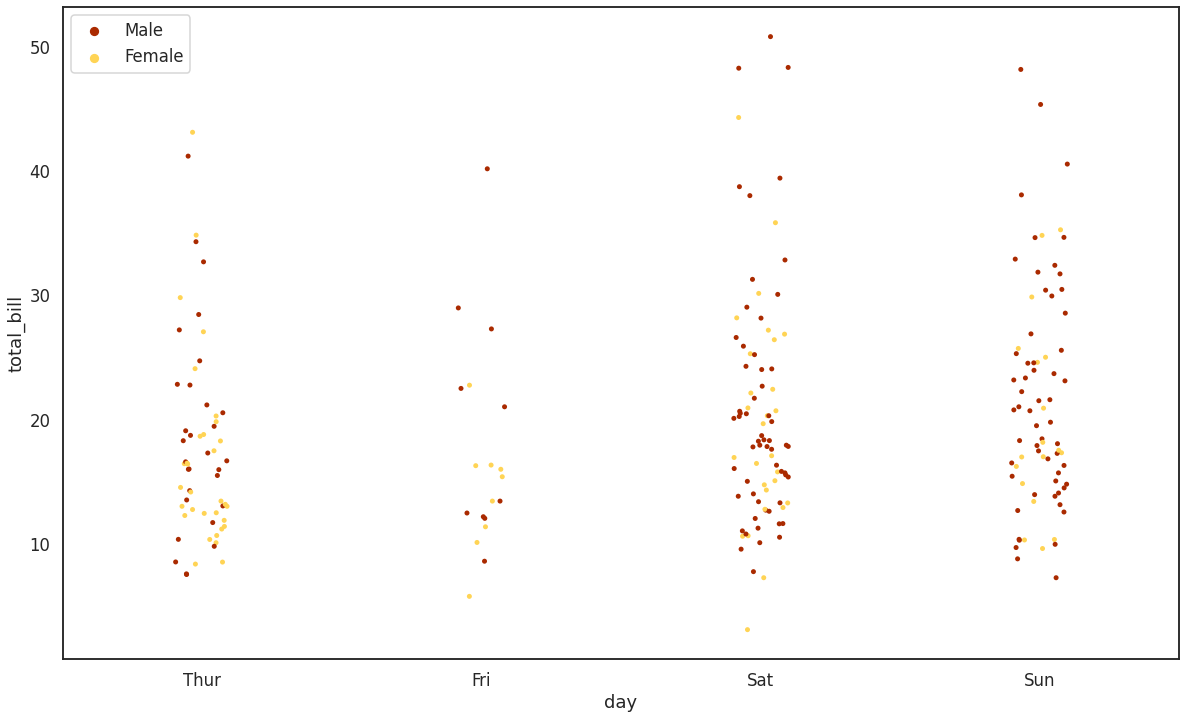

In [55]:
plt.figure(figsize=(20,12))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(x='day',y='total_bill',data=tips_df,hue='sex',palette='afmhot')
plt.legend(loc=2)
# 1 - upper right
# 2 - upper left
# 3 - lower left
# 4 - lower right

## Matrix Plots


### Heatmaps

<AxesSubplot:>

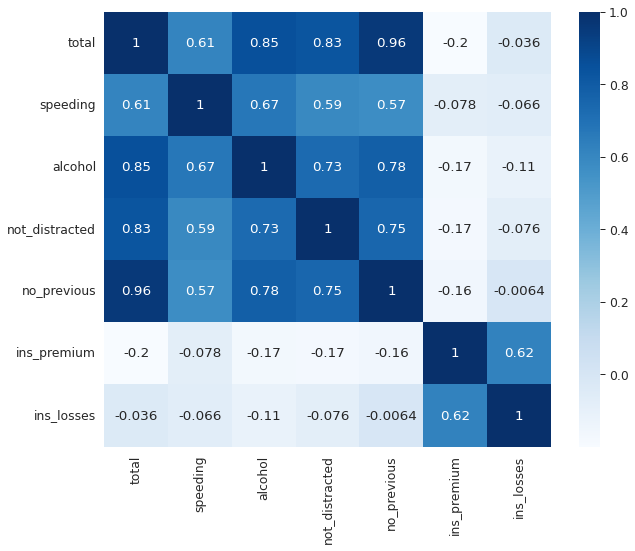

In [59]:
plt.figure(figsize=(10,8))
sns.set_context('paper',font_scale=1.4)

crash_mx= crash_df.corr()
sns.heatmap(crash_mx,annot=True,cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

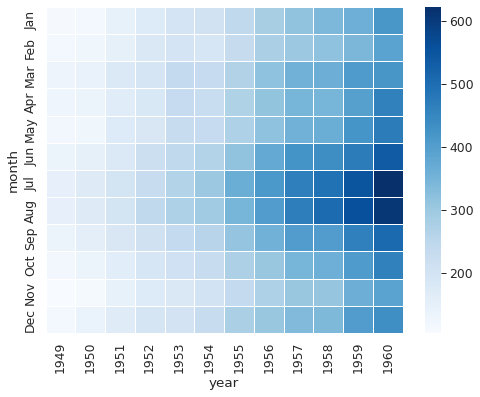

In [63]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)